In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv(r'./laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)


In [7]:
screen_info = df['ScreenResolution'].str.extract(r'(IPS Panel)?\s?(.*?)\s?(\d+x\d+)')
df[['Resolution_Width', 'Resolution_Height']] = screen_info[2].str.split('x', expand=True).astype(float)
df.drop(columns=['ScreenResolution'], inplace=True)


In [8]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution_Width,Resolution_Height
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0


In [9]:
def split_cpu(cpu):
    match = re.match(r'(\w+) (.+) (\d+[\.\d+]*)?GHz?', str(cpu))
    if match:
        return match.groups()
    return (None, None, None)
df[['CPU Brand', 'CPU Series', 'CPU Frequency']] = df['Cpu'].apply(lambda x: pd.Series(split_cpu(x)))
df.drop(columns=['Cpu'],inplace=True)
print(df[['CPU Brand', 'CPU Series', 'CPU Frequency']].head())


  CPU Brand     CPU Series CPU Frequency
0     Intel        Core i5           2.3
1     Intel        Core i5           1.8
2     Intel  Core i5 7200U           2.5
3     Intel        Core i7           2.7
4     Intel        Core i5           3.1


In [10]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution_Width,Resolution_Height,CPU Brand,CPU Series,CPU Frequency
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,Intel,Core i5,2.3
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,Intel,Core i5,1.8
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,Intel,Core i5 7200U,2.5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,Intel,Core i7,2.7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,Intel,Core i5,3.1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Ram                1303 non-null   object 
 4   Memory             1303 non-null   object 
 5   Gpu                1303 non-null   object 
 6   OpSys              1303 non-null   object 
 7   Weight             1303 non-null   object 
 8   Price              1303 non-null   float64
 9   Resolution_Width   1303 non-null   float64
 10  Resolution_Height  1303 non-null   float64
 11  CPU Brand          1303 non-null   object 
 12  CPU Series         1303 non-null   object 
 13  CPU Frequency      1303 non-null   object 
dtypes: float64(4), object(10)
memory usage: 142.6+ KB


In [12]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


In [13]:
def extract_storage_size(memory):
    parts = memory.split()
    size = 0
    for part in parts:
        if "TB" in part:
            size += float(part.replace("TB", "")) * 1000
        elif "GB" in part:
            size += float(part.replace("GB", ""))
    return int(size)

def extract_storage_type(memory):
    if "HDD" in memory and "SSD" in memory or "Hybrid" in memory:
        return "Hybrid"
    elif "HDD" in memory:
        return "HDD"
    elif "SSD" in memory:
        return "SSD"
    elif "Flash Storage" in memory:
        return "Flash Storage"
    else:
        return "Unknown"

df["Storage Capacity"] = df["Memory"].apply(extract_storage_size)
df["Storage Type"] = df["Memory"].apply(extract_storage_type)

df.drop(columns=["Memory"], inplace=True)

df.head()


,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Resolution_Width,Resolution_Height,CPU Brand,CPU Series,CPU Frequency,Storage Capacity,Storage Type
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,Intel,Core i5,2.3,128,SSD
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,Intel,Core i5,1.8,128,Flash Storage
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,Intel,Core i5 7200U,2.5,256,SSD
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,Intel,Core i7,2.7,512,SSD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,Intel,Core i5,3.1,256,SSD


In [14]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Resolution_Width,Resolution_Height,CPU Brand,CPU Series,CPU Frequency,Storage Capacity,Storage Type
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,Intel,Core i5,2.3,128,SSD
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,Intel,Core i5,1.8,128,Flash Storage
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,Intel,Core i5 7200U,2.5,256,SSD
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,Intel,Core i7,2.7,512,SSD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,Intel,Core i5,3.1,256,SSD


In [15]:
gpu_info = df['Gpu'].str.split(' ', n=1, expand=True)
df['Gpu_Brand'] = gpu_info[0]
df['Gpu_Model'] = gpu_info[1]
df.drop(columns=['Gpu'], inplace=True)


In [16]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Resolution_Width,Resolution_Height,CPU Brand,CPU Series,CPU Frequency,Storage Capacity,Storage Type,Gpu_Brand,Gpu_Model
0,Apple,Ultrabook,13.3,8,macOS,1.37kg,71378.6832,2560.0,1600.0,Intel,Core i5,2.3,128,SSD,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34kg,47895.5232,1440.0,900.0,Intel,Core i5,1.8,128,Flash Storage,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,1.86kg,30636.0000,1920.0,1080.0,Intel,Core i5 7200U,2.5,256,SSD,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,1.83kg,135195.3360,2880.0,1800.0,Intel,Core i7,2.7,512,SSD,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1.37kg,96095.8080,2560.0,1600.0,Intel,Core i5,3.1,256,SSD,Intel,Iris Plus Graphics 650


In [17]:
if 'Weight' in df.columns:
    df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Ram                1303 non-null   int64  
 4   OpSys              1303 non-null   object 
 5   Weight             1303 non-null   float64
 6   Price              1303 non-null   float64
 7   Resolution_Width   1303 non-null   float64
 8   Resolution_Height  1303 non-null   float64
 9   CPU Brand          1303 non-null   object 
 10  CPU Series         1303 non-null   object 
 11  CPU Frequency      1303 non-null   object 
 12  Storage Capacity   1303 non-null   int64  
 13  Storage Type       1303 non-null   object 
 14  Gpu_Brand          1303 non-null   object 
 15  Gpu_Model          1303 non-null   object 
dtypes: float64(5), int64(2),

In [19]:
df.to_csv('clean_data.csv')

In [20]:
df.describe()

,Inches,Ram,Weight,Price,Resolution_Width,Resolution_Height,Storage Capacity
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910,1894.784344,1070.830391,610.904068
std,1.426304,5.084665,0.665475,37243.201786,494.641028,284.519410,467.509021
min,10.100000,2.000000,0.690000,9270.720000,1366.000000,768.000000,8.000000
25%,14.000000,4.000000,1.500000,31914.720000,1600.000000,900.000000,256.000000
50%,15.600000,8.000000,2.040000,52054.560000,1920.000000,1080.000000,500.000000
75%,15.600000,8.000000,2.300000,79274.246400,1920.000000,1080.000000,1000.000000
max,18.400000,64.000000,4.700000,324954.720000,3840.000000,2160.000000,2512.000000


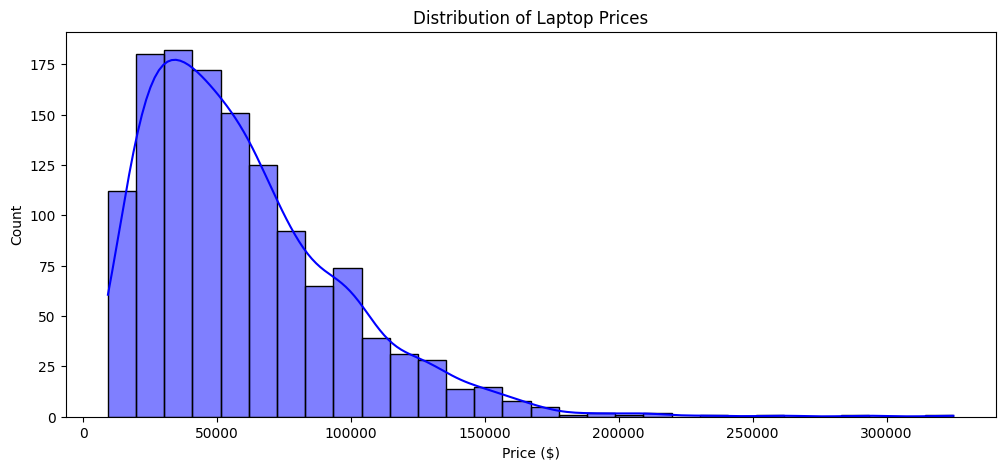

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Distribution of Laptop Prices")
plt.show()

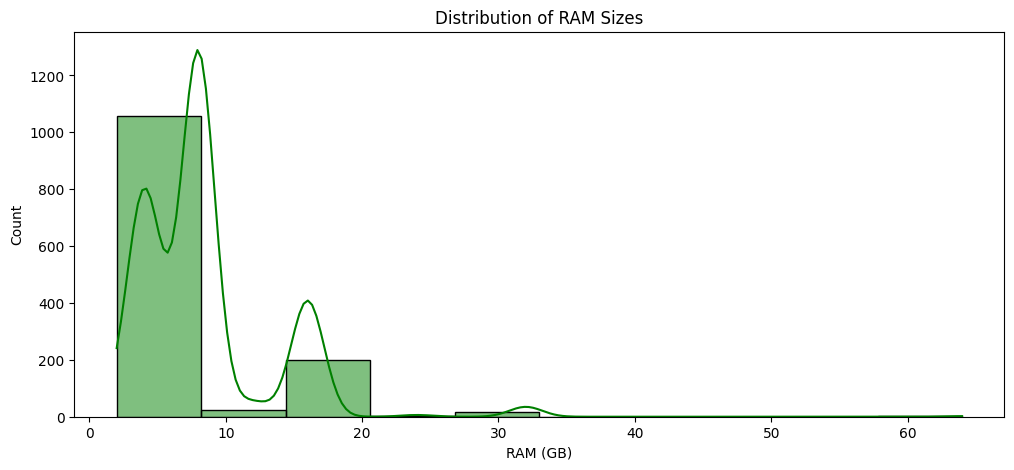

In [22]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Ram"], bins=10, kde=True, color="green")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.title("Distribution of RAM Sizes")
plt.show()

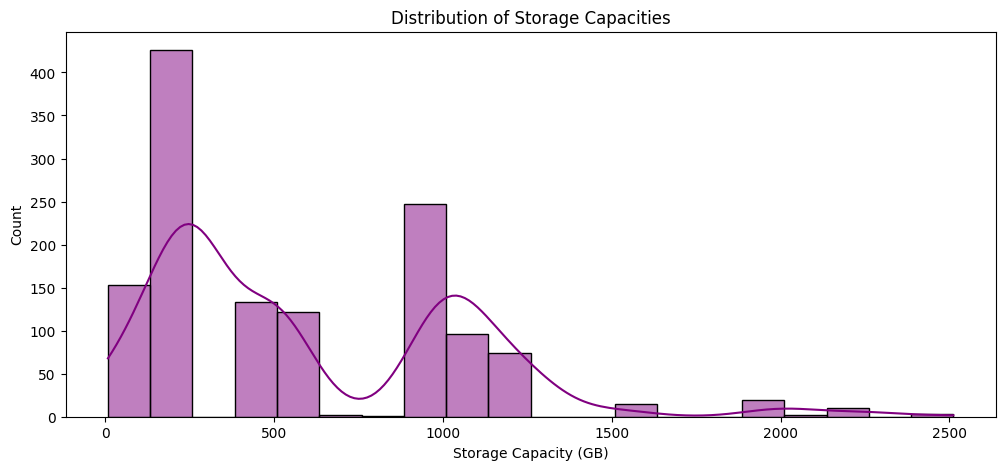

In [23]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Storage Capacity"], bins=20, kde=True, color="purple")
plt.xlabel("Storage Capacity (GB)")
plt.ylabel("Count")
plt.title("Distribution of Storage Capacities")
plt.show()

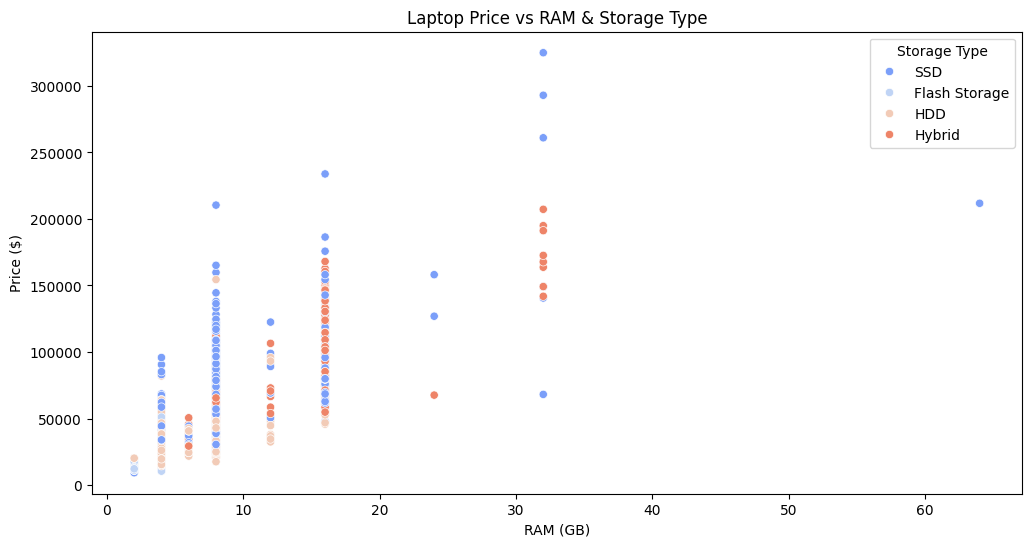

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Ram"], y=df["Price"], hue=df["Storage Type"], palette="coolwarm")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.title("Laptop Price vs RAM & Storage Type")
plt.legend(title="Storage Type")
plt.show()

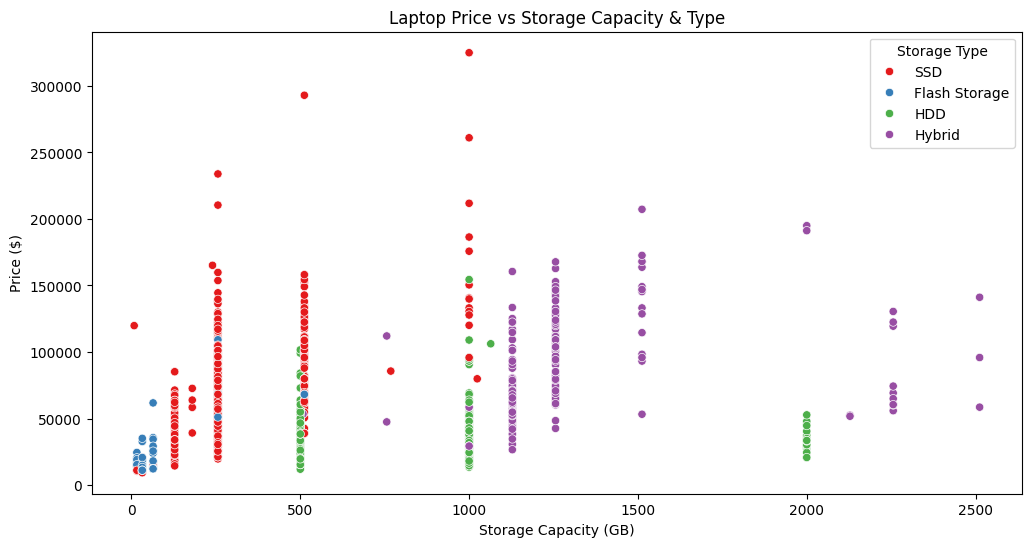

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Storage Capacity"], y=df["Price"], hue=df["Storage Type"], palette="Set1")
plt.xlabel("Storage Capacity (GB)")
plt.ylabel("Price ($)")
plt.title("Laptop Price vs Storage Capacity & Type")
plt.legend(title="Storage Type")
plt.show()

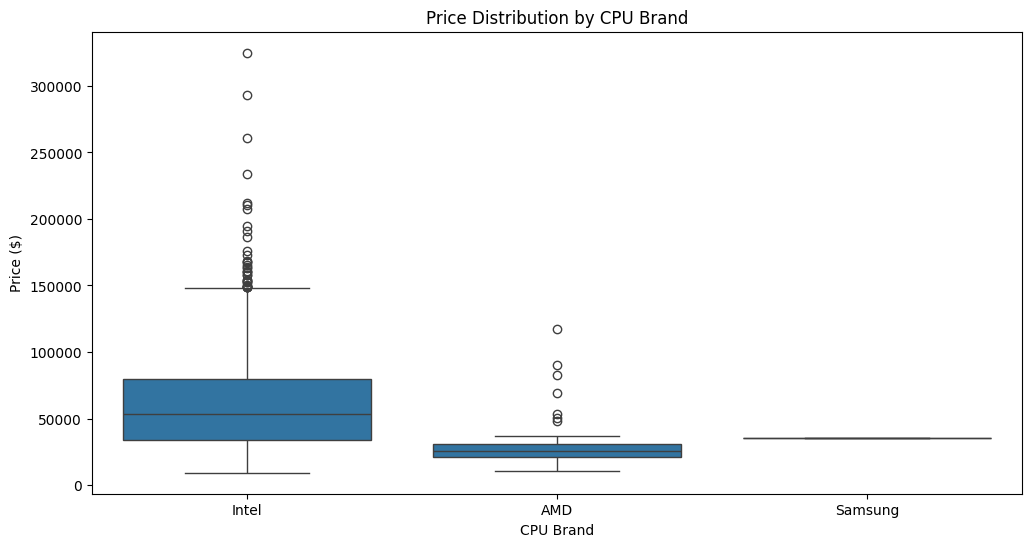

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="CPU Brand", y="Price", data=df)
plt.xlabel("CPU Brand")
plt.ylabel("Price ($)")
plt.title("Price Distribution by CPU Brand")
plt.show()

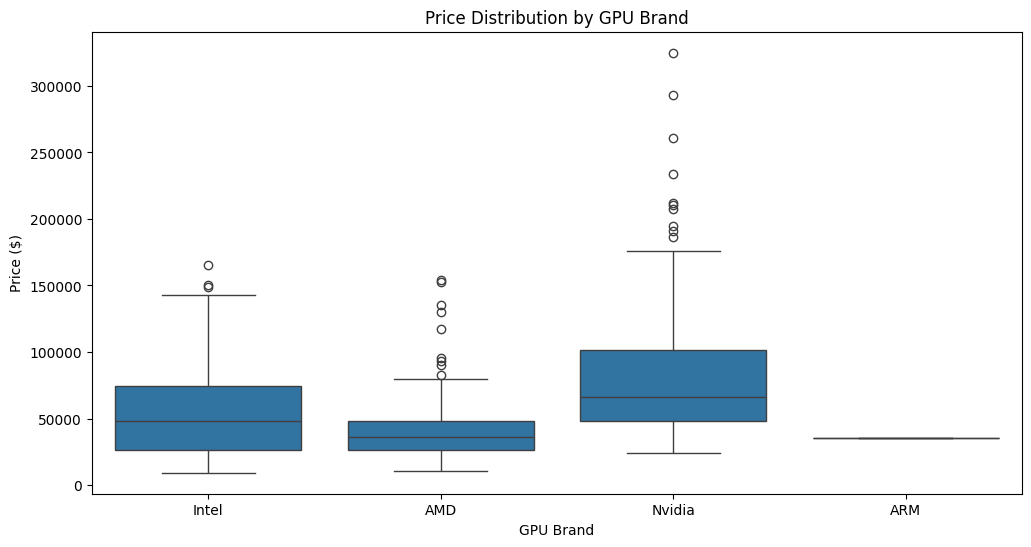

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Gpu_Brand", y="Price", data=df)
plt.xlabel("GPU Brand")
plt.ylabel("Price ($)")
plt.title("Price Distribution by GPU Brand")
plt.show()

C:\Users\AbulRahman Metwalley\AppData\Local\Temp\ipykernel_10584\2039473726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TypeName", data=df, palette="viridis", order=df["TypeName"].value_counts().index)


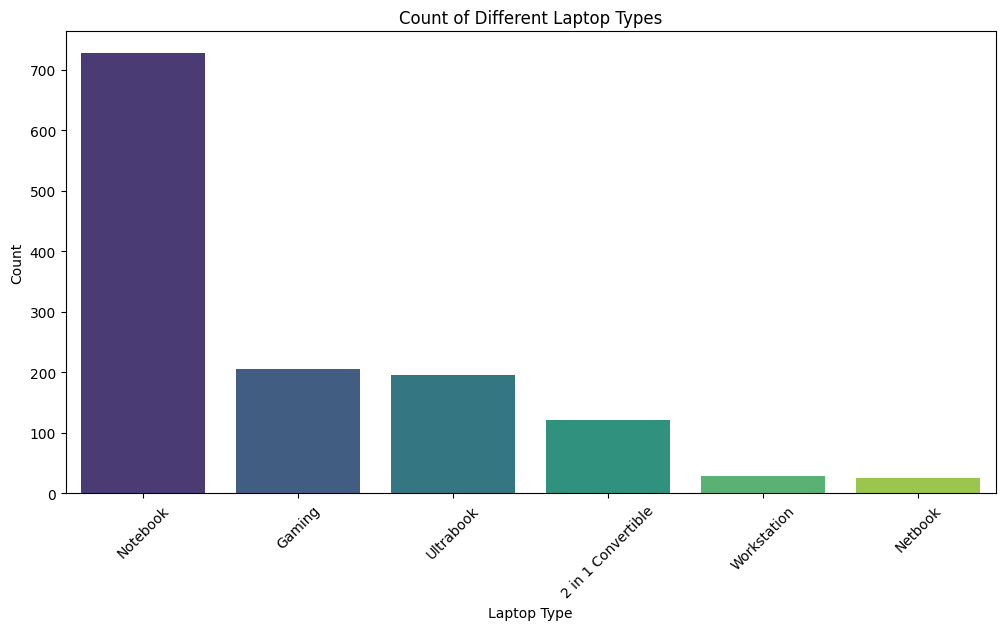

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x="TypeName", data=df, palette="viridis", order=df["TypeName"].value_counts().index)
plt.xlabel("Laptop Type")
plt.ylabel("Count")
plt.title("Count of Different Laptop Types")
plt.xticks(rotation=45)
plt.show()

C:\Users\AbulRahman Metwalley\AppData\Local\Temp\ipykernel_10584\1618552523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TypeName", y="Price", data=df, palette="coolwarm")


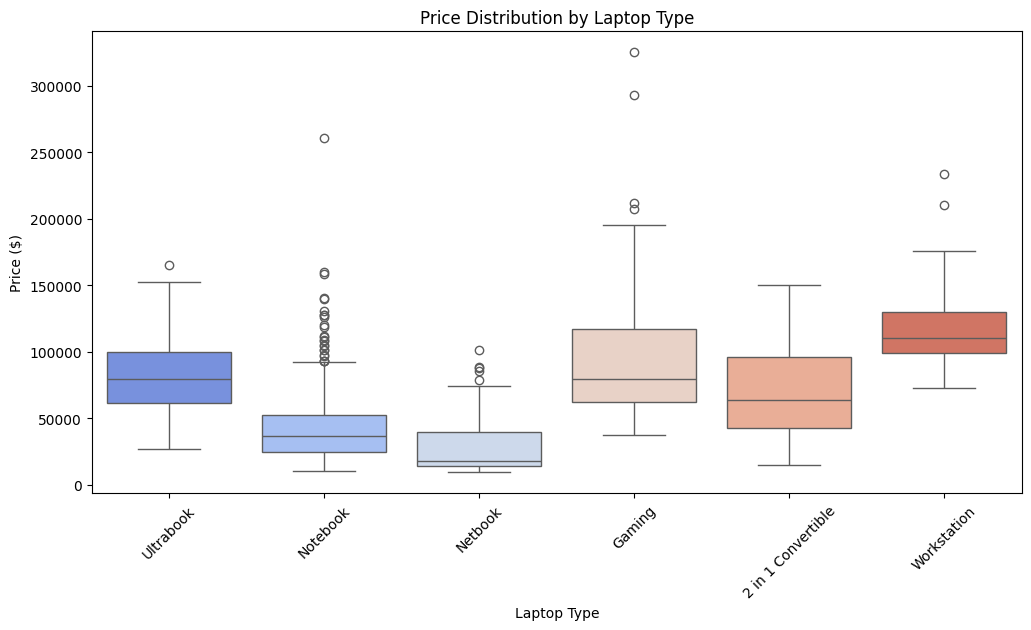

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="TypeName", y="Price", data=df, palette="coolwarm")
plt.xlabel("Laptop Type")
plt.ylabel("Price ($)")
plt.title("Price Distribution by Laptop Type")
plt.xticks(rotation=45)
plt.show()

In [30]:
import dash
from dash import Dash, dcc, html
import plotly.express as px
from dash.dependencies import Input, Output

app = Dash(__name__) 

fig_price_distribution = px.histogram(df, x="Price", nbins=30, title="Distribution of Laptop Prices")
fig_price_vs_ram = px.scatter(df, x="Ram", y="Price", color="Storage Type", title="Price vs RAM & Storage Type")
fig_price_vs_type = px.box(df, x="TypeName", y="Price", title="Price Distribution by Laptop Type")

storage_types = df["Storage Type"].unique()

app.layout = html.Div([
    html.H1("Laptop Data Dashboard", style={'textAlign': 'center'}),

    dcc.Graph(figure=fig_price_distribution),
    dcc.Graph(figure=fig_price_vs_ram),
    dcc.Graph(figure=fig_price_vs_type),

    html.Label("Select Storage Type:"),
    dcc.Dropdown(
        id="storage-dropdown",
        options=[{"label": storage, "value": storage} for storage in storage_types],
        value=storage_types[0],
        clearable=False
    ),
    dcc.Graph(id="price-vs-storage")
])

@app.callback(
    Output("price-vs-storage", "figure"),
    [Input("storage-dropdown", "value")]
)
def update_price_vs_storage(selected_storage):
    filtered_df = df[df["Storage Type"] == selected_storage]
    fig = px.histogram(filtered_df, x="Price", nbins=20, title=f"Price Distribution for {selected_storage} Storage")
    return fig

if __name__ == "__main__":
    app.run_server(jupyter_mode="inline") 

In [31]:
df = pd.read_csv("clean_data.csv")